In [1]:
import matplotlib.pyplot as plt
import re
import geonamescache
import pandas as pd
import unidecode
from sklearn.cluster import KMeans
import json
import numpy as np
from mpl_toolkits.basemap import Basemap


In [2]:
save_file_path1 = "data/headlinesGeoNamesAndLocationNoNaN.json"
df_loc = pd.read_json(save_file_path1, orient = 'records')

In [3]:
save_file_path2 = "data/headlinesGeoNamesAndLocationsNoNanAbove2.json"
df_loc2 = pd.read_json(save_file_path2, orient = 'records')


In [4]:
df_loc.shape

(606, 5)

In [5]:
df_loc2.shape

(533, 5)

In [6]:
df_loc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 5 columns):
headline       533 non-null object
cities         533 non-null object
latitude       533 non-null float64
longitude      533 non-null float64
countrycode    533 non-null object
dtypes: float64(2), object(3)
memory usage: 20.9+ KB


In [7]:
df_locOnly = df_loc[["latitude", "longitude"]]

In [8]:
df_locOnly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 2 columns):
latitude     606 non-null float64
longitude    606 non-null float64
dtypes: float64(2)
memory usage: 9.6 KB


In [9]:
num_clusters=3
cluster_model = KMeans(n_clusters=num_clusters)
loc_clusters = cluster_model.fit_predict(df_locOnly)

#print("locations clusters:")
#print(loc_clusters)

In [10]:
loc_clusters.shape


(606,)

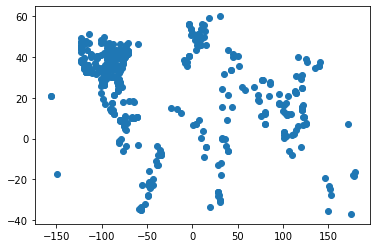

In [11]:
x_coordinates = []
y_coordinates = []

for i in range(len(df_locOnly)):
    y_coordinates.append(df_locOnly.iloc[i]['latitude'])
    x_coordinates.append(df_locOnly.iloc[i]['longitude'])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

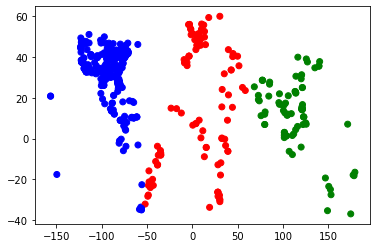

In [12]:
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
colors = [['b', 'g', 'r', 'c', 'm', 'y'][cluster] for cluster in  loc_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

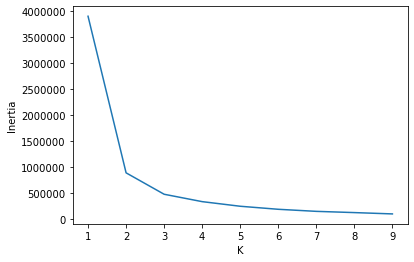

In [13]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(df_locOnly).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.715491216641072
For n_clusters = 3 The average silhouette_score is : 0.6681355964346238
For n_clusters = 4 The average silhouette_score is : 0.572236622036084
For n_clusters = 5 The average silhouette_score is : 0.5574180118046531
For n_clusters = 6 The average silhouette_score is : 0.5560992596000207
For n_clusters = 7 The average silhouette_score is : 0.5573590651119085
For n_clusters = 8 The average silhouette_score is : 0.560700525742469
For n_clusters = 9 The average silhouette_score is : 0.5480574470350722


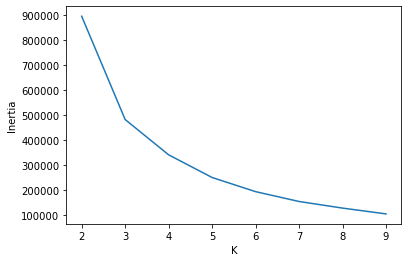

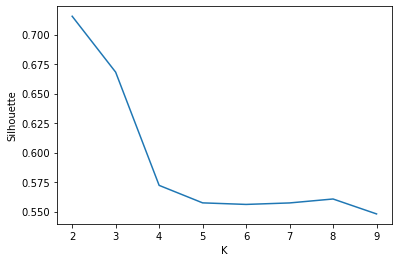

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
inertia_values = []
silhouette_avg = []
pred_clusters = []

k_values = range(2, 10)
for k in k_values:
    kmeanscluster = KMeans(n_clusters=k, random_state=0).fit(df_locOnly)    
    inertia_values = inertia_values + [kmeanscluster.inertia_]
    pred_clusters = kmeanscluster.labels_
    silhouette_avg = silhouette_avg + [silhouette_score(df_locOnly.to_numpy(), pred_clusters)]
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg[k-2])
      
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_values, silhouette_avg)
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.show()

In [15]:
from sklearn.cluster import DBSCAN
epsilon = 10
min_points = 4 # these params were selected after different trials 
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
loc_clusters = cluster_model.fit_predict(df_locOnly.to_numpy())

In [16]:
np.unique(loc_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [17]:
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#colors = [['b', 'g', 'r', 'c', 'm', 'y' ,'k', 'w'][cluster+1] for cluster in loc_clusters]
colorsP1 = [cluster+1 for cluster in loc_clusters]
colorsP1[1:20]

[1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4]

<function matplotlib.pyplot.show(*args, **kw)>

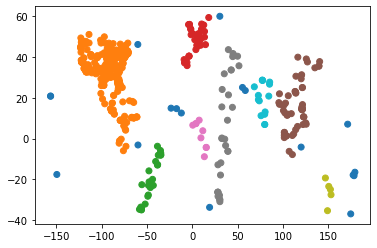

In [18]:
plt.scatter(x_coordinates, y_coordinates, c=colorsP1, cmap='tab10')
plt.show

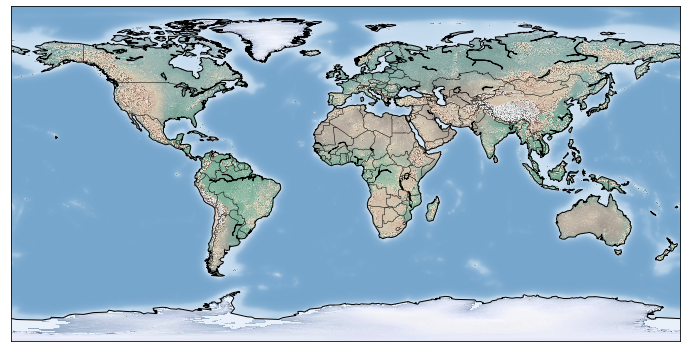

In [19]:
map_plotter = Basemap()
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()
plt.show()

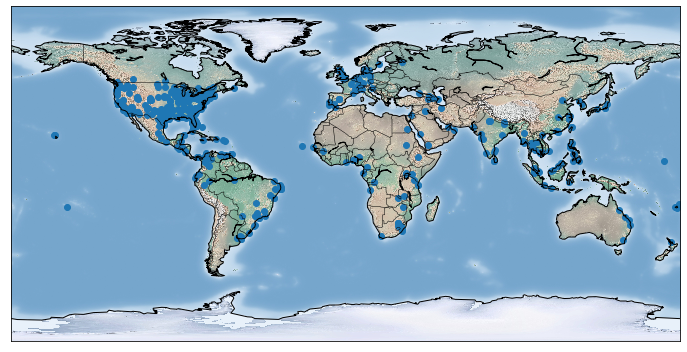

In [20]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()
map_plotter.scatter(x_coordinates, y_coordinates, latlon=True)
plt.show()

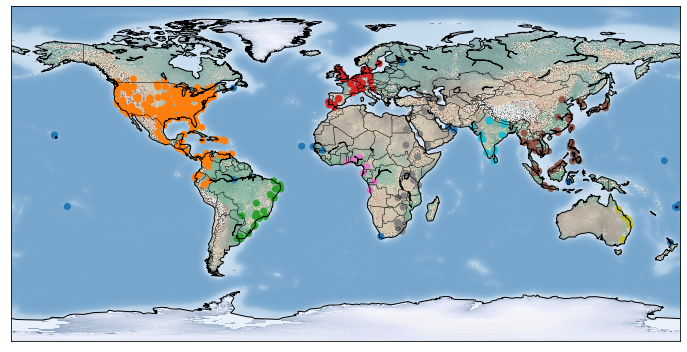

In [21]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()
map_plotter.scatter(x_coordinates, y_coordinates, c=colorsP1, cmap='tab10', latlon=True)
plt.show()

In [22]:

group = np.unique(colorsP1)
cdict = {1: 'red', 2: 'blue', 3: 'green'}


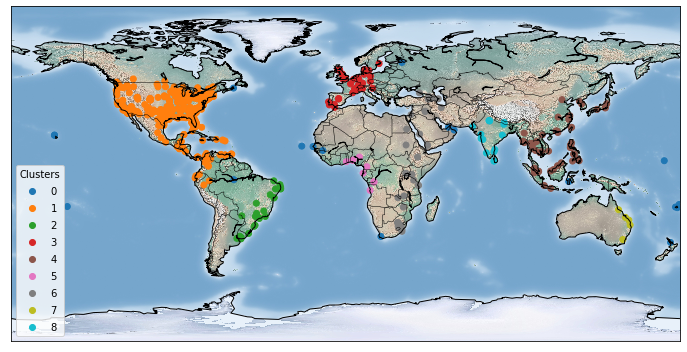

In [23]:

fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()
scatter = map_plotter.scatter(x_coordinates, y_coordinates, c=colorsP1, cmap='tab10', latlon=True)
plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
plt.show()